In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math


In [2]:
file = pd.read_csv('con_1.csv',header = None)
feature_names = ['sensor1','sensor2','sensor3','Region','Location_x','Location_y','time']
file.columns = feature_names

In [12]:
Y_region = file['Region']
Y_region = [int(i) for i in Y_region]
Y_y = file['Location_y'].values
Y_x = file['Location_x'].values
X = file[['sensor1','sensor2','sensor3']].values

Y_xy = []
for i in range(0,len(Y_x)):
    Y_xy.append([Y_x[i],Y_y[i]])
(X_train,X_test,Y_region_train,Y_region_test,Y_y_train,Y_y_test,Y_x_train,Y_x_test,Y_xy_train,Y_xy_test)=train_test_split(X, Y_region, Y_y, Y_x, Y_xy, test_size=0.3)   


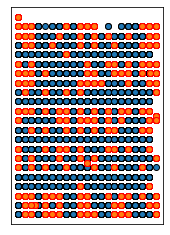

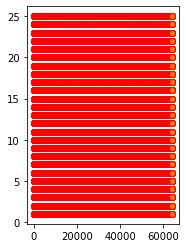

In [13]:
num_estimators =100 
num_features = 3 

Bagged_region = BaggingClassifier(n_estimators=num_estimators ,max_features=num_features,  warm_start=True, random_state=0)
Bagged_region.fit(X_train, Y_region_train)
Bagged_x = BaggingRegressor( n_estimators=num_estimators ,max_features=num_features,  warm_start=False, random_state=0)
Bagged_x.fit(X_train, Y_x_train)
Bagged_y = BaggingRegressor( n_estimators=num_estimators , max_features=num_features,  warm_start=False, random_state=0)
Bagged_y.fit(X_train, Y_y_train)

Y_region_pred_test = Bagged_region.predict(X_test)
Y_region_pred_test= [int (i) for i in Y_region_pred_test]
Y_x_pred_test = Bagged_x.predict(X_test)
Y_x_pred_test= [int (i)//10*10 for i in Y_x_pred_test]
Y_y_pred_test = Bagged_y.predict(X_test)
Y_y_pred_test= [int (i)//10*10 for i in Y_y_pred_test]


Y_region_pred_train = Bagged_region.predict(X_train)
Y_region_pred_train= [int (i) for i in Y_region_pred_train]
Y_x_pred_train = Bagged_x.predict(X_train)
Y_x_pred_train= [int (i)//10*10 for i in Y_x_pred_train]
Y_y_pred_train = Bagged_y.predict(X_train)
Y_y_pred_train= [int (i)//10*10 for i in Y_y_pred_train]

plt.subplot(1, 2, 1)
plt.scatter(Y_x_pred_test, Y_y_pred_test,cmap=plt.cm.Set1,edgecolor='k')
plt.scatter(Y_x_test, Y_y_test,cmap=plt.cm.Set2,edgecolor='r')
plt.xticks(())
plt.yticks(())
plt.show()

plt.subplot(1, 2, 2)
num = [i for i in range(1,len(Y_region_pred_test)+1)]
plt.scatter(num,Y_region_pred_test,edgecolor='k')
plt.scatter(num,Y_region_test,edgecolor='r')



Bagged_xy = BaggingRegressor( n_estimators=num_estimators , max_features=num_features,  warm_start=False, random_state=0)
Bagged_xy.fit(X_train, Y_xy_train)
Y_xy_pred_test = Bagged_xy.predict(X_test)
Y_xy_pred_train = Bagged_xy.predict(X_train)
for i in range(0,len(Y_xy_pred_test)):
    Y_xy_pred_test[i][0] = int(Y_xy_pred_test[i][0])
    Y_xy_pred_test[i][1] = int(Y_xy_pred_test[i][1])
    

In [14]:
#x and y
thre_test = 40
accuracy_test = 0
rsme_test = 0
for i in range(0,len(Y_x_pred_test)):
    rsme_test += (Y_x_pred_test[i]-Y_x_test[i])*(Y_x_pred_test[i]-Y_x_test[i]) + (Y_y_pred_test[i]-Y_y_test[i])*(Y_y_pred_test[i]-Y_y_test[i])
    if abs(Y_x_pred_test[i]-Y_x_test[i]) <= thre_test and abs(Y_y_pred_test[i]-Y_y_test[i]) <= thre_test:
        accuracy_test += 1
accuracy_test = accuracy_test/len(Y_x_pred_test)*100
rsme_test = math.sqrt(rsme_test / len(Y_x_pred_test) / 2)
print("X_Y TEST Accuracy is %.2f"%accuracy_test, "% in threshold",thre_test)
print("X_Y TEST RSME is ",rsme_test)
        

X_Y TEST Accuracy is 52.83 % in threshold 40
X_Y TEST RSME is  48.76215038997445


In [15]:
#xy
thre_test = 40
accuracy_test = 0
rsme_test = 0
for i in range(0,len(Y_xy_pred_test)):
    rsme_test += (Y_xy_pred_test[i][0]-Y_xy_test[i][0])*(Y_xy_pred_test[i][0]-Y_xy_test[i][0]) + (Y_xy_pred_test[i][1]-Y_xy_test[i][1])*(Y_xy_pred_test[i][1]-Y_xy_test[i][1])
    if abs(Y_xy_pred_test[i][0]-Y_xy_test[i][0]) <= thre_test and abs(Y_xy_pred_test[i][1]-Y_xy_test[i][1]) <= thre_test:
        accuracy_test += 1
accuracy_test = accuracy_test/len(Y_x_pred_test)*100
rsme_test = math.sqrt(rsme_test / len(Y_x_pred_test) / 2)
print("XY TEST Accuracy is %.2f"%accuracy_test, "% in threshold",thre_test)
print("XY TEST RSME is ",rsme_test)

XY TEST Accuracy is 49.08 % in threshold 40
XY TEST RSME is  48.44218451152052


In [16]:
#x and y
thre_train = 40
accuracy_train = 0
rsme_train = 0
for i in range(0,len(Y_x_pred_train)):
    rsme_train += (Y_x_pred_train[i]-Y_x_train[i])*(Y_x_pred_train[i]-Y_x_train[i]) + (Y_y_pred_train[i]-Y_y_train[i])*(Y_y_pred_train[i]-Y_y_train[i])
    if abs(Y_x_pred_train[i]-Y_x_train[i]) <= thre_train and abs(Y_y_pred_train[i]-Y_y_train[i]) <= thre_train:
        accuracy_train += 1
accuracy_train = accuracy_train/len(Y_x_pred_train)*100
rsme_train = math.sqrt(rsme_train / len(Y_x_pred_train) / 2)
print("X_Y TRAIN Accuracy is %.2f"%accuracy_train, "% in threshold",thre_train)
print("X_Y TRAIN RSME is ",rsme_train)
        

X_Y TRAIN Accuracy is 68.29 % in threshold 40
X_Y TRAIN RSME is  39.34821703677724


In [17]:
# xy
thre_train = 40
accuracy_train = 0
rsme_train = 0
for i in range(0,len(Y_xy_pred_train)):
    rsme_train += (Y_xy_pred_train[i][0]-Y_xy_train[i][0])*(Y_xy_pred_train[i][0]-Y_xy_train[i][0]) + (Y_xy_pred_train[i][1]-Y_xy_train[i][1])*(Y_xy_pred_train[i][1]-Y_xy_train[i][1])
    if abs(Y_xy_pred_train[i][0]-Y_xy_train[i][0]) <= thre_train and abs(Y_xy_pred_train[i][1]-Y_xy_train[i][1]) <= thre_train:
        accuracy_train += 1
accuracy_train = accuracy_train/len(Y_x_pred_train)*100
rsme_train = math.sqrt(rsme_train / len(Y_x_pred_train) / 2)
print("XY TRAIN Accuracy is %.2f"%accuracy_train, "% in threshold",thre_train)
print("XY TRAIN RSME is ",rsme_train)
        

XY TRAIN Accuracy is 64.63 % in threshold 40
XY TRAIN RSME is  38.94359788092455


In [18]:
accuracy_test = 0
accuracy_train = 0

for i in range(0,len(Y_region_pred_train)):
    if Y_region_pred_train[i] == Y_region_train[i]:
        accuracy_train += 1
accuracy_train = accuracy_train/len(Y_region_pred_train)*100

for i in range(0,len(Y_region_pred_test)):
    if Y_region_pred_test[i] == Y_region_test[i]:
        accuracy_test += 1
accuracy_test = accuracy_test/len(Y_region_pred_test)*100

print("Region TRAIN Accuracy is %.2f"%accuracy_train, "%")
print("Region TEST Accuracy is %.2f"%accuracy_test, "%")

Region TRAIN Accuracy is 69.43 %
Region TEST Accuracy is 50.03 %


In [20]:
import joblib
joblib.dump(Bagged_x, 'Bagged_x_25.model')
joblib.dump(Bagged_y, 'Bagged_y_25.model')
joblib.dump(Bagged_xy, 'Bagged_xy_25.model')
joblib.dump(Bagged_region, 'Bagged_region_25.model')


['Bagged_region_25.model']